<a href="https://colab.research.google.com/github/jainary4/Friends_of_friends/blob/main/Friends_of_Friends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def create_distribution(means, covariances, d, n):
    """
    Generates samples from multiple multivariate normal distributions defined by
    specified means and covariance matrices.

    This function creates a set of points for each Gaussian distribution specified by the mean
    vectors and covariance matrices provided. It utilizes the Cholesky decomposition to transform
    standard normal samples into the desired Gaussian distribution.

    Parameters:
    - means (list of arrays): A list where each element is an array representing the mean vector
      of a Gaussian distribution. Each mean vector should be of length `d`.
    - covariances (list of arrays): A list of symmetric, positive-definite matrices where each matrix
      is the covariance matrix of a Gaussian distribution. Each matrix should be `d x d`.
    - d (int): The dimensionality of the Gaussian distributions.
    - n (int): The number of samples to generate for each distribution.

    Returns:
    - list of arrays: Each array in the list contains `n` samples from one of the Gaussian distributions,
      where each sample is a `d`-dimensional vector.

    Example:
    - To generate samples from two 3-dimensional Gaussian distributions, each with 100 samples:
        means = [np.array([1, 2, 3]), np.array([-1, -2, -3])]
        covariances = [np.array([[1, 0.5, 0], [0.5, 1, 0.5], [0, 0.5, 1]]),
                       np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])]
        samples = create_distribution(means, covariances, 3, 100)
        print(samples)

    Notes:
    - The function sets a fixed random seed (42) to ensure repeatability of the results. This can be
      modified if varying results are desired across different runs.
    """
    result = []
    for mean, covariance in zip(means, covariances):
        # Perform Cholesky decomposition of the covariance matrix
        L = np.linalg.cholesky(covariance)
        # Generate n d-dimensional standard normal samples
        np.random.seed(42)
        X = np.random.normal(size=(d, n))
        # Apply the affine transformation to get samples from the desired Gaussian distribution
        Y = (L.dot(X)).T + mean
        result.append(Y)
    return result


In [3]:
from mpl_toolkits.mplot3d import Axes3D

def plot_gaussian(data):
    """
    Plots multiple Gaussian distributions in 2D or 3D space.

    This function takes in data representing the positions of particles sampled from multiple Gaussian
    distributions and plots them in either 2D or 3D space.

    Args:
    - data (numpy.ndarray): A numpy matrix of size (num, n, d), where num is the number of Gaussian
      distributions, n is the number of particles, and d is the number of coordinates (2 or 3). Each row
      vector defines the position of one of the particles.

    Returns:
    None. Displays the plot of the distributions.

    Example:
    data = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8], [9, 10]])]
    plot_gaussian(data)

    Notes:
    - The function automatically detects whether the data represents 2D or 3D distributions and plots
      accordingly.
    - The colors of the points in the plot represent different Gaussian distributions.
    """
    num_gaussians, _, dimensions = np.shape(data)

    if dimensions == 2:
        fig, ax = plt.subplots()
        colors = plt.cm.rainbow(np.linspace(0, 1, num_gaussians))

        for samples, color in zip(data, colors):
            ax.scatter(samples[:, 0], samples[:, 1], s=10, color=color, alpha=0.5)

        ax.set_title('2D Scatter Plot of Multiple Gaussian Distributions')
        ax.set_xlabel('X coordinate')
        ax.set_ylabel('Y coordinate')
        plt.show()

    elif dimensions == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        colors = plt.cm.rainbow(np.linspace(0, 1, num_gaussians))

        for samples, color in zip(data, colors):
            ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=10, color=color, alpha=0.5)

        ax.set_title('3D Scatter Plot of Multiple Gaussian Distributions')
        ax.set_xlabel('X coordinate')
        ax.set_ylabel('Y coordinate')
        ax.set_zlabel('Z coordinate')
        plt.show()

    else:
        print("Only Graphs for 2-d and 3-d are available")


In [4]:

def norm_calculator(points):
  """
    Calculates the pairwise Euclidean norm between points in a list.

    This function takes in a list of points, where each point is represented as a numpy array,
    and computes the pairwise Euclidean norm between each pair of points. The resulting norms
    are stored in a list.

    Args:
    - points (list of numpy.ndarray): A list of numpy arrays representing points in a vector space.
      Each numpy array should have the same dimensionality.

    Returns:
    - norm_list (list of numpy.ndarray): A list containing the pairwise Euclidean norms between points.
      Each element in the list corresponds to a pair of points, and the norms are stored in numpy arrays.

    Example:
    points = [np.array([1, 2]), np.array([3, 4]), np.array([5, 6])]
    norms = norm_calculator(points)
    print(norms)

    Notes:
    - The input points should have the same dimensionality.
    - The output list contains the Euclidean norms computed using the formula: norm(x - y) for all pairs
      of points (x, y) in the input list.
  """
  norm_list=[]
  for point in points:
    reshaped = point[:,np.newaxis,:]
    reshaped_2= point[np.newaxis,:,:]
    difference = reshaped_2-reshaped
    norm = np.linalg.norm(difference, 2,2)
    norm_list.append(norm)
  return norm_list


In [5]:
def mean_distance(norm_matrix):
  """
    Calculates the mean pairwise distance from a matrix of pairwise norms.

    This function takes in a matrix of pairwise Euclidean norms between points and computes
    the mean pairwise distance. The input matrix should contain the pairwise norms between
    points, and each row corresponds to a pair of points.

    Args:
    - norm_matrix (numpy.ndarray): A matrix containing pairwise Euclidean norms between points.
      Each row of the matrix represents the norms between a pair of points.

    Returns:
    - mean_average (float): The mean pairwise distance calculated from the norms in the input matrix.

    Example:
    norm_matrix = np.array([[0, 1, 2], [1, 0, 3], [2, 3, 0]])
    mean_dist = mean_distance(norm_matrix)
    print(mean_dist)

    Notes:
    - The input matrix should be square, and each row should contain the norms between a pair of points.
    - The mean pairwise distance is calculated by averaging the sum of norms over all pairs of points.
  """
  mean_list=[]
  for norm in norm_matrix:
    sum = np.sum(norm)
    adjusted_sum = sum/2
    mean = adjusted_sum/((norm.shape)[0]* (norm.shape[0]-1))
    mean_list.append(mean)
  mean_array= np.array(mean_list)
  mean_average= np.sum(mean_list)/(np.shape(norm_matrix)[0])
  return mean_average

We now have a random seed that generates points in 3-d space based on a gaussian distribution using the affine transform concept from multivariate
Gaussian Distributions and then we sample N points from the given distribution
we also have a function that plots the points in 3d space and a function to calculate the mean distance between particles


The next part of the code develops the concept of KD-tree data structure to query neighbour points within a*linkin_length distance from a given point

A KD-tree is a data structure used to solve the problem of finding the neareast neighbour of a N-dimensional point in N-dimensional space contaning P points. The way a KD-tree works is it continuously slices the space along N-dimensions until leaf nodes are reached. The structure is similar to a binary search tree , but instead of storing 1 number at each node an array of N numbers is stored, the root node is found by taking the median of the set of all particles along a specific axis and then comparing the elements on that axis to set the tree a sample implementation of a K-D tree is as such


In [6]:
class KD_tree:
  def __init__(self, point, left=None, right= None):
    self.point= point
    self.left= left
    self.right= right

def build_tree(points, depth=0):
  if(len(points)==0):
    return None
  dim = points.shape[1]
  axis= depth % dim
  #sorted array along the specified axis
  points = points[:, axis].argsort()
  median = len(points)//2
  return KD_tree(
      point= points[median],
      left= build_tree(points[ :median],depth+1),
      right= build_tree(points[median+1:], depth+1)
  )
  # the above code recursively calls the build_tree function at the same time creates a new node with the given point
  # we first find the median of all the points in our points array along a specified axis found using the equation: axis= depth mod dim
  # then at each level we put elements in the left tree if they are smaller compared to the root on that axis


We will use the scipy library to use the pre-defined KD tree data structure , the way we will build our code using a KD-tree is as such: after implementing the tree we use the function query_ball_point to find the neighbours of a point within a given linking length distance we then add the indexes to all these points into a cluster array
and initiallize a merge array which adds all the points that are merged as one cluster since we can have multiple clusters with the given linking length we record all clusters in the cluster list


In [7]:
from scipy.spatial import KDTree
def friends_of_friends(points, linking_factor, primary_length):
    """
    Identifies clusters of points using the friends-of-friends algorithm.

    This function applies the friends-of-friends algorithm to identify clusters of points in a distribution.
    Given a set of points and a linking length factor, it finds clusters where each point is within a certain
    distance (determined by the linking length factor) of at least one other point in the cluster.

    Parameters:
    - points (ndarray): The array containing all the points in the distribution.
    - linking_factor (float): The factor of the primary length over which clusters are formed.
    - primary_length (float): Initially set to the mean length between any two particles in the distribution.
      It can be adjusted to any length to determine the linking length.

    Returns:
    - clusters_list (list of sets): A list of sets where each set represents a cluster of points.

    Notes:
    - The `linking_factor` determines the distance over which points are considered to be part of the same cluster.
    - The `primary_length` parameter sets the initial length scale for the clustering process.
    """

    clusters_list = []
    linking_length = linking_factor * primary_length
    tree = KDTree(points)
    visited = set()

    for i in range(len(points)):
        if i not in visited:
            neighbour_indices = tree.query_ball_point(points[i], linking_length)
            new_cluster = set(neighbour_indices)
            merge_with = []

            for index, cluster in enumerate(clusters_list):
                if not cluster.isdisjoint(new_cluster):
                    merge_with.append(index)

            if merge_with:
                merged_cluster = new_cluster
                for idx in sorted(merge_with, reverse=True):
                    merged_cluster |= clusters_list.pop(idx)
                clusters_list.append(merged_cluster)
            else:
                clusters_list.append(new_cluster)

            visited.update(new_cluster)

    return clusters_list

In [8]:
def length_clusters(clusters):
   """
    Computes the length of each cluster found using the friends-of-friends algorithm.

    Args:
    - clusters_list (list of sets): A list containing the clusters identified by the friends-of-friends algorithm.

    Returns:
    - length_list (list of int): A list containing the length of each cluster in the Gaussian distribution.

    Notes:
    - The input `clusters_list` should be a list of sets, where each set represents a cluster of points.
    - The output `length_list` contains the number of points in each cluster.
    """
   length_list=[]
   for i in range(len(clusters)):
         length_list.append(len(clusters[i]))
   return length_list

In [9]:
def bar_plot(cluster_lengths):
    """
    Creates a bar plot of cluster lengths.

    This function takes a list of cluster lengths and generates a bar plot where each bar represents
    the length of a cluster. The color of each bar is determined by a colormap based on the index of
    the cluster.

    Args:
    - cluster_lengths (list of int): A list containing the lengths of clusters.

    Returns:
    None. Displays the bar plot.

    Notes:
    - The input `cluster_lengths` should be a list of integers representing the lengths of clusters.
    """
    colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_lengths)))
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(cluster_lengths)), cluster_lengths, color=colors)
    plt.title('Bar Graph of Cluster Lengths')
    plt.xlabel('Cluster Index')
    plt.ylabel('Cluster Length')
    plt.show()



In [10]:
def cluster_map(cluster_list, points):
    """
    Maps cluster indices to corresponding points in the original points array.

    This function takes a list of cluster indices and maps each index to the corresponding points
    in the original points array. It returns a list of lists, where each inner list contains the points
    belonging to a single cluster.

    Args:
    - cluster_list (list of sets): A list containing the cluster indices.
    - points (numpy.ndarray): The array containing all the points.

    Returns:
    - main_list (list of lists of arrays): A list of lists where each inner list contains the points
      belonging to a single cluster.

    Notes:
    - The input `cluster_list` should contain sets of indices representing clusters.
    - The input `points` should be a numpy array where each row represents a point.
    """
    main_list = []
    for cluster in cluster_list:
        l = list(cluster)
        second_list = []
        for index in l:
            second_list.append(points[index, :])

        main_list.append(second_list)
    return main_list





In [ ]:
def plot_clusters(data):

    """Plot a 3D scatter plot where each sublist in the provided list of lists is
    plotted with a distinct color.

    The function uses a 3D scatter plot to visualize clusters of points. Each cluster
    (sublist of `data`) is plotted in a unique color to differentiate it among others.
    It makes use of the matplotlib library for plotting and numpy for handling the numerical operations.

    Parameters:
    - data (list of lists of np.array): Each sublist contains numpy arrays with
      3 elements (x, y, z coordinates). Each sublist represents a cluster of points.

    Returns:
    None. Displays a 3D scatter plot.

    Example:
    data = [
        [np.array([1, 2, 3]), np.array([4, 5, 6])],
        [np.array([7, 8, 9])]
    ]
    plot_cluster(data)
    Notes:
    This function assumes that the input data is correctly formatted, where each
    inner list contains arrays of size 3 for the x, y, z coordinates respectively."""


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = plt.cm.jet(np.linspace(0, 1, len(data)))  # Generate distinct colors for each cluster
    all_points = np.concatenate(data)  # Flatten the list of lists into a single numpy array
    color_array = np.concatenate([[colors[idx]] * len(sublist) for idx, sublist in enumerate(data)])  # Create a color mapping

    ax.scatter(all_points[:, 0], all_points[:, 1], all_points[:, 2], color=color_array)  # Plot all points with corresponding colors

    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    plt.title('3D Scatter Plot of Points')
    plt.show()  # Display the plot

In [71]:
"""def plot_clusters(data):

    Plots clusters of points in 2D or 3D depending on the dimensionality of the points.

    This function takes a list of points and plots them in 2D or 3D space depending on the
    dimensionality of the points.

    Args:
    - data (list of numpy.ndarray): A list of numpy arrays representing points in a vector space.
      Each numpy array should have the same dimensionality.

    Returns:
    None. Displays the plot.

    Notes:
    - If the points have 2D coordinates, a 2D scatter plot will be generated.
    - If the points have 3D coordinates, a 3D scatter plot will be generated.

    dimensions=len(data[0][0])

    if dimensions == 2:
        fig, ax = plt.subplots()
        for i, samples in enumerate(data):
            ax.scatter(samples[:, 0], samples[:, 1], s=10, label=f'Cluster {i+1}')
        ax.set_title('2D Scatter Plot of Clusters')
        ax.set_xlabel('X coordinate')
        ax.set_ylabel('Y coordinate')
        ax.legend()
        plt.show()
    elif dimensions == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i, samples in enumerate(data):
            ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=10, label=f'Cluster {i+1}')
        ax.set_title('3D Scatter Plot of Clusters')
        ax.set_xlabel('X coordinate')
        ax.set_ylabel('Y coordinate')
        ax.set_zlabel('Z coordinate')
        ax.legend()
        plt.show()
    else:
        print("Unsupported dimensionality. Only 2D and 3D plots are supported.")"""


'def plot_clusters(data):  \n    \n    Plots clusters of points in 2D or 3D depending on the dimensionality of the points.\n\n    This function takes a list of points and plots them in 2D or 3D space depending on the\n    dimensionality of the points.\n\n    Args:\n    - data (list of numpy.ndarray): A list of numpy arrays representing points in a vector space.\n      Each numpy array should have the same dimensionality.\n\n    Returns:\n    None. Displays the plot.\n\n    Notes:\n    - If the points have 2D coordinates, a 2D scatter plot will be generated.\n    - If the points have 3D coordinates, a 3D scatter plot will be generated.\n    \n    dimensions=len(data[0][0])\n\n    if dimensions == 2:\n        fig, ax = plt.subplots()\n        for i, samples in enumerate(data):\n            ax.scatter(samples[:, 0], samples[:, 1], s=10, label=f\'Cluster {i+1}\')\n        ax.set_title(\'2D Scatter Plot of Clusters\')\n        ax.set_xlabel(\'X coordinate\')\n        ax.set_ylabel(\'Y coord

In [24]:
def generate_positive_definite_matrix(dim):
    """
    Generates a positive definite matrix of the specified dimension.

    This function generates a positive definite matrix of the specified dimension by first creating
    a symmetric matrix from random values, ensuring its positive definiteness by adjusting its eigenvalues
    if necessary, and returning the resulting positive definite matrix.

    Args:
    - dim (int): The dimension of the square matrix to be generated.

    Returns:
    - positive_definite_matrix (numpy.ndarray): A positive definite matrix of dimension (dim x dim).

    Notes:
    - The function ensures positive definiteness by adjusting the smallest eigenvalue of the symmetric matrix.
    - The input dimension `dim` determines the size of the square matrix to be generated.
    """
    A = np.random.rand(dim, dim)
    symmetric_matrix = (A + A.T) / 2
    eigenvalues, _ = np.linalg.eigh(symmetric_matrix)
    min_eigenvalue = min(eigenvalues)
    epsilon = 1e-5
    #np.eye creates a diagonal matrix of the given dimension,
    if min_eigenvalue < epsilon:
        positive_definite_matrix = symmetric_matrix + (epsilon - min_eigenvalue) * np.eye(dim)
    else:
        positive_definite_matrix = symmetric_matrix

    return positive_definite_matrix

In [25]:
def combine_Gaussian(output_of_generate_gausian):
  """Param: output_of_generate_gaussian- takes in the matrix and combines all the seperate elements into a single matrix
  Example if we create 3 gaussians of 10 elements each containing 3 Dimensions, then this function would return a 30 row 3-d array """
  return np.concatenate(output_of_generate_gausian)

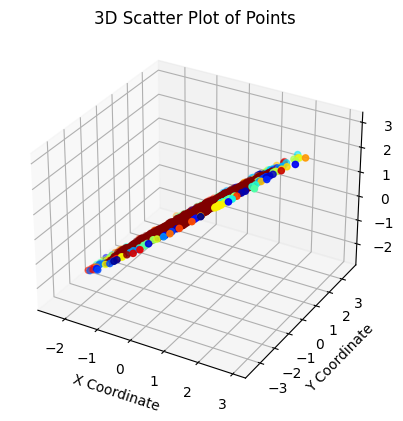

In [26]:
# Test 1: Single Gaussian generator with small linking factor
mean2 = [np.array([0, 0, 0])]
m1= generate_positive_definite_matrix(3)
covariance2=[m1]
A= create_distribution(mean2, covariance2,3,4000)
norms= norm_calculator(A)
means= mean_distance(norms)
linking_factor= 0.2
A= combine_Gaussian(A)
cluster_array= friends_of_friends(A,linking_factor, means)
main= cluster_map(cluster_array,A)
plot_clusters(main)
# result as we suspected , multiple clusters with a small culster

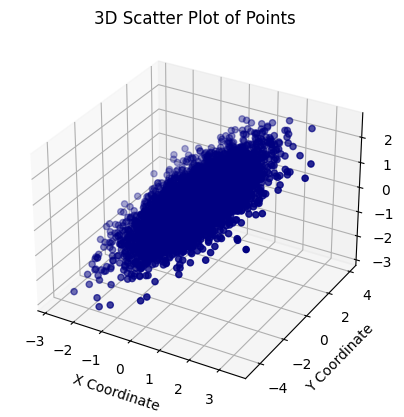

In [27]:
# Test 2: single gaussian , large linking length
mean3 = [np.array([0, 0, 0])]
m1= generate_positive_definite_matrix(3)
covariance3=[m1]
B= create_distribution(mean3, covariance3,3,5000)

C=np.concatenate(B)

norms2= norm_calculator(B)
means2= mean_distance(norms2)
linking_factor2= 5
cluster_array2= friends_of_friends(C,linking_factor2, means2)
main2= cluster_map(cluster_array2,C)
plot_clusters(main2)

# expected result of a single cluster of all the particles

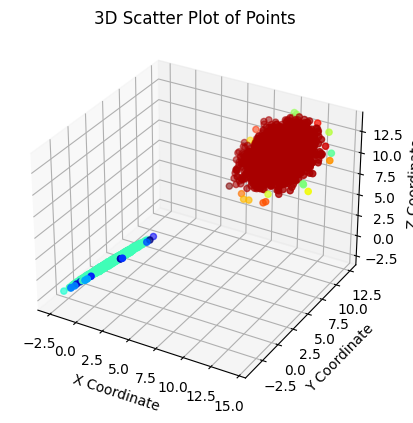

In [28]:
# test 3 : 2 gaussians , far apart with small linking length
mean1= [np.array([0,0,0]),np.array([10,10,10])]
c1= generate_positive_definite_matrix(3)
c2=generate_positive_definite_matrix(3)
covariance1=[c1,c2]
B= create_distribution(mean1, covariance1,3,5000)

C=np.concatenate(B)

norms2= norm_calculator(B)
means2= mean_distance(norms2)
linking_factor2= 0.5
cluster_array2= friends_of_friends(C,linking_factor2, means2)
main2= cluster_map(cluster_array2,C)
plot_clusters(main2)
# expected result , there my be multiple clusters forming with each gaussian but the gaussians are not clustered together
# because linking length is much smaller than the distance between the center of the 2 gaussians
# in the next example we will take linking length to be around the mean difference


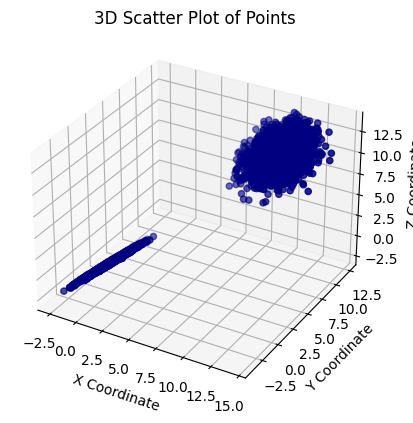

In [29]:
# test 4 : 2 gaussians , far apart with large linking length
mean1= [np.array([0,0,0]),np.array([10,10,10])]
c1= generate_positive_definite_matrix(3)
c2=generate_positive_definite_matrix(3)
covariance1=[c1,c2]
B= create_distribution(mean1, covariance1,3,5000)

C=np.concatenate(B)

norms2= norm_calculator(B)
means2= mean_distance(norms2)
linking_factor2= 15
cluster_array2= friends_of_friends(C,linking_factor2, means2)
main2= cluster_map(cluster_array2,C)
plot_clusters(main2)
# expected result , we see that both the gaussians fall in the same cluster becuase the linking length is so big

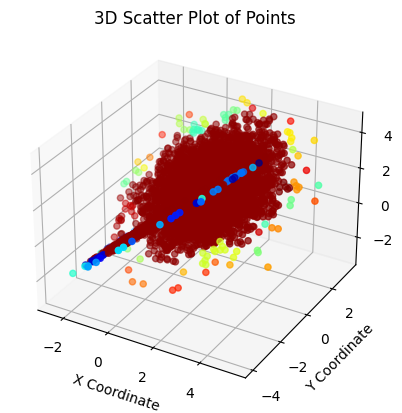

In [30]:
# test 4 : 2 gaussians , close apart with small linking length
mean1= [np.array([0,0,0]),np.array([1,1,1])]
c1= generate_positive_definite_matrix(3)
c2=generate_positive_definite_matrix(3)
covariance1=[c1,c2]
B= create_distribution(mean1, covariance1,3,5000)

C=np.concatenate(B)

norms2= norm_calculator(B)
means2= mean_distance(norms2)
linking_factor2= 0.3
cluster_array2= friends_of_friends(C,linking_factor2, means2)
main2= cluster_map(cluster_array2,C)
plot_clusters(main2)
# expected result , there is a single big cluster in the center where the 2 gaussians meet , if we were to increase the linking length more the entire distribution would be a single cluster


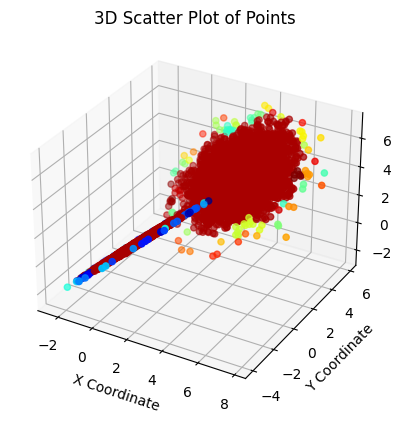

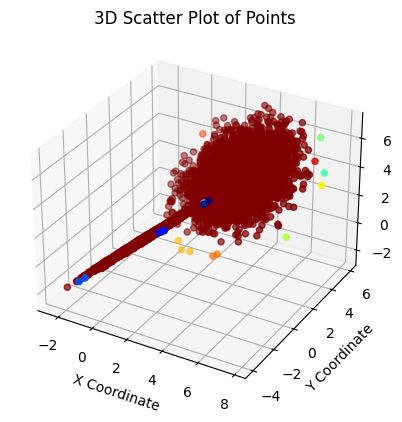

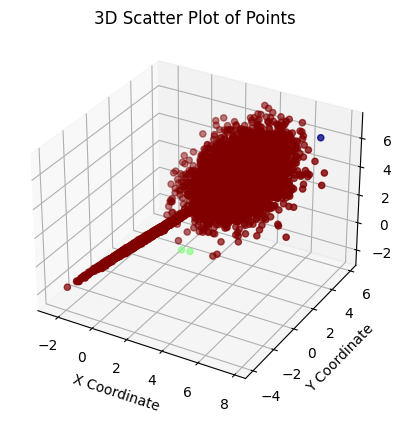

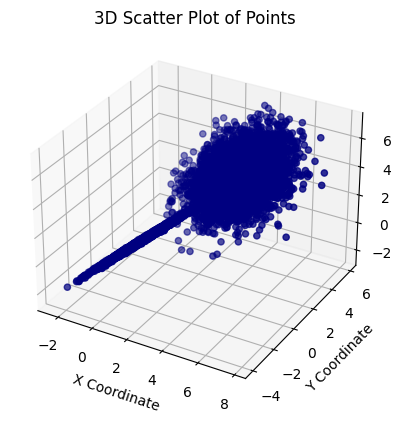

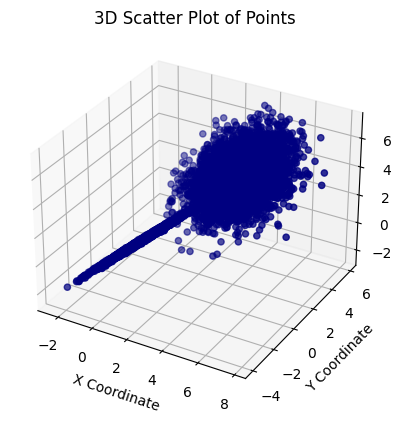

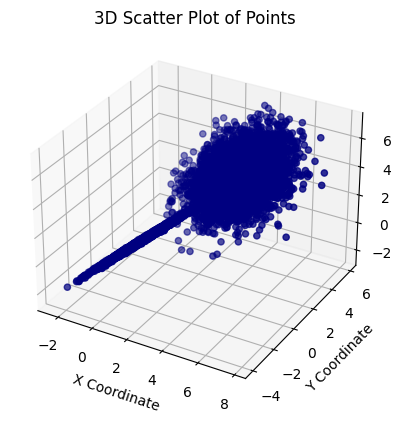

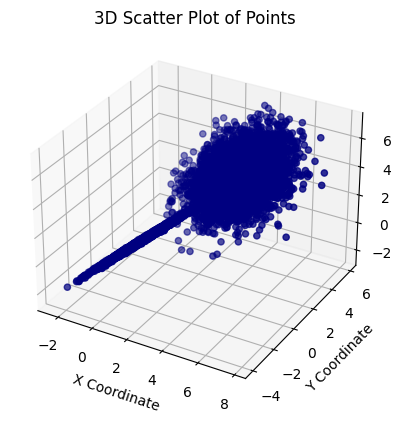

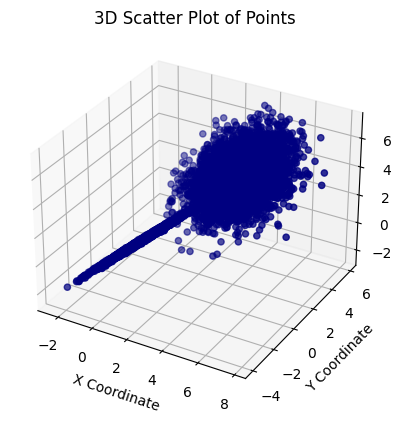

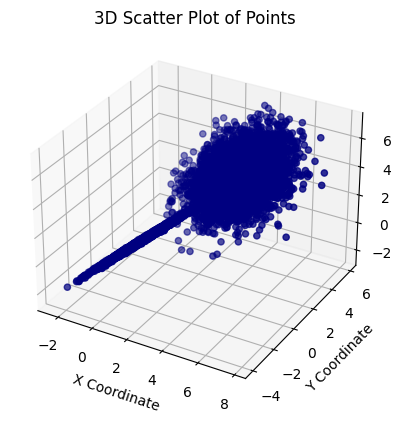

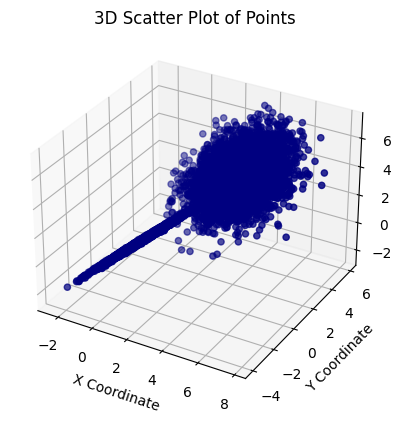

In [33]:
# test 5 : 2 gaussians , close apart with varying linking length
mean1= [np.array([0,0,0]),np.array([3.5,3.5,3.5])]
c1= generate_positive_definite_matrix(3)
c2=generate_positive_definite_matrix(3)
covariance1=[c1,c2]
B= create_distribution(mean1, covariance1,3,5000)

C=np.concatenate(B)

norms2= norm_calculator(B)
means2= mean_distance(norms2)
for i in [0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3]:
  linking_factor2= i
  cluster_array2= friends_of_friends(C,linking_factor2, means2)
  main2= cluster_map(cluster_array2,C)
  plot_clusters(main2)